<a href="https://colab.research.google.com/github/NeuroTechBSB/BR41N.IO-2025/blob/main/ecog_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Uploading the data files locally in the Google Drive space
from google.colab import files
files.upload() #this will prompt you to upload a file locally into the Google Drive (temporally for the session)

## Alternatively (if want to use a already downloaded file in Google Drive):
# from google.colab import drive
# drive.mount('/content/drive')
# !cp /content/drive/MyDrive/FILE.zip /content
# %%capture
# !unzip /content/FILE.zip -d data

In [114]:
!pip install pymatreader
from pymatreader import read_mat

data_temp = read_mat('ECoG_Handpose.mat')

In [122]:
data_temp

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Jun 23 10:38:21 2020',
 '__version__': '1.0',
 '__globals__': [],
 'y': array([[ 0.00000000e+00,  8.33333333e-04,  1.66666667e-03, ...,
          4.22518333e+02,  4.22519167e+02,  4.22520000e+02],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -1.06701961e+05, -1.06699477e+05, -1.06697859e+05],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -8.62051094e+04, -8.62023672e+04, -8.61986562e+04],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          1.53902262e-01,  1.53902262e-01,  1.53902262e-01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          1.61574081e-01,  1.61574081e-01,  1.61574081e-01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          2.34732822e-01,  2.34732822e-01,  2.34732822e-01]])}

In [115]:
import pandas as pd
import numpy as np

data = pd.DataFrame(data_temp['y']);
# data = 67 rows × 507025 columns

# Data matrix description: [channel x time]
# CH1: sample time
# CH2-61: ECoG (raw and DC-coupled; recorded from right sensorimotor cortex)
# CH62: paradigm info (0...relax, 1...fist movement, 2...peace movement, 3...open hand)
# CH63: data glove thumb
# CH64: data glove index
# CH65: data glove middle
# CH66: data glove ring
# CH67: data glove little

sample_time = data.loc[0,:]
ecog = data.loc[1:60,:]
paradigm_info = data.loc[61,:]
glove_thumb = data.loc[62,:]
glove_index = data.loc[63,:]
glove_ring = data.loc[64,:]
glove_litlle = data.loc[66,:]

data = data.transpose()
col_names = [f'CH_{i}' for i in range(1, 62)] # All from right sensorimotor cortex
col_names.extend(['paradigm_info','data_glove_thumb', 'data_glove_index','data_glove_middle', 'data_glove_ring', 'data_glove_little' ])
data.columns = col_names

relax = data[data['paradigm_info'] == 0]
fist_movement = data[data['paradigm_info'] == 1]
peace_movement = data[data['paradigm_info'] == 2]
open_hand = data[data['paradigm_info'] == 3]

data.iloc[:,:61].describe()

In [162]:
data = pd.DataFrame(data_temp['y'])
ecog = data.loc[0:61,:]
ecog

0           1           2           3            4       \
0   0.000000e+00    0.000833    0.001667    0.002500     0.003333   
1  -2.704041e-11  339.021111  644.811720  887.399816  1043.010744   
2   2.389129e-11  267.264308  508.336715  699.593151   822.293325   
3   1.661533e-11  258.312940  491.311632  676.163574   794.756321   
4   2.389129e-11  329.265884  626.257221  861.864256  1012.996358   
5   2.063416e-12  213.532434  406.143572  558.962740   657.019439   
6   5.701395e-12  160.086353  304.494719  419.083146   492.631170   
7  -3.393552e-12   90.958516  173.020076  238.158312   280.002806   
8  -5.212542e-12  -64.869900 -123.352035 -169.687865  -199.315302   
9  -6.576784e-12   29.698264   56.510253   77.830307    91.586712   
10 -7.941026e-12   81.280459  154.613856  212.830440   250.239060   
11  2.063416e-12  116.192752  221.013149  304.202351   357.619484   
12  5.701395e-12  192.809140  366.729693  504.724238   593.276170   
13 -5.780976e-12   42.894001   81.605609  112.360415   132.160113   
14  2.063416e-12  331.647016  630.786182  868.097292  1020.322745   
15 -3.393552e-12  -61.475522 -116.933982 -160.947509  -189.208846   
16  2.025331e-11  -45.201094  -85.993410 -118.398377  -139.255770   
17  2.063416e-12  -41.198463  -78.376448 -107.906029  -126.905945   
18 -7.031531e-12  -50.874310  -96.746670 -133.107099  -156.381165   
19 -5.212542e-12  -49.323793  -93.821760 -129.140423  -151.824760   
20 -3.393552e-12  -48.723543  -92.677066 -127.557741  -149.951286   
21  3.882406e-12  -72.912198 -138.687641 -190.888418  -224.405822   
22 -8.850520e-12  -50.817761  -96.642434 -132.971720  -156.236620   
23 -1.066951e-11  -61.409760 -116.781883 -160.672573  -188.767244   
24 -1.248850e-11  -45.500214  -86.553655 -119.148326  -140.099210   
25 -6.122036e-12  -47.761365  -90.842431 -125.021743  -146.950445   
26 -1.574563e-12  -58.221590 -110.745009 -152.430034  -179.197570   
27 -3.393552e-12  -46.297851  -88.061428 -121.200718  -142.470669   
28 -3.848299e-12  -56.588668 -107.626114 -148.105900  -174.057644   
29 -5.894663e-12  -57.778178 -109.885795 -151.209039  -177.692873   
30  1.297735e-11  -49.253836  -93.695102 -128.981655  -151.666188   
31 -1.248850e-11  -39.380719  -74.940274 -103.228404  -121.500648   
32  9.339374e-12  -39.554120  -75.270591 -103.684243  -122.038670   
33 -7.031531e-12  -55.345773 -105.247458 -144.796658  -170.103659   
34 -1.976446e-11  -60.374666 -114.782815 -157.847709  -185.313922   
35 -6.650680e-13  -44.348239  -84.348464 -116.079161  -136.429873   
36  2.444267e-13  -63.734918 -121.203967 -166.757538  -195.917832   
37  9.339374e-12  -40.805717  -77.624173 -106.857849  -125.650667   
38  2.444267e-13  -57.668444 -109.688456 -150.965004  -177.455759   
39  2.063416e-12  -56.291073 -107.085051 -147.421849  -173.362978   
40 -1.574563e-12  -60.360227 -114.775229 -157.885544  -185.445541   
41  2.063416e-12  -50.939390  -96.902115 -133.397897  -156.861728   
42 -1.574563e-12  -40.619285  -77.270343 -106.372744  -125.083817   
43  9.339374e-12  -38.313558  -72.914507 -100.450109  -118.252482   
44 -4.303047e-12  -54.759933 -104.141072 -143.293156  -168.371032   
45  3.882406e-12  -51.416469  -97.797795 -134.602112  -158.225763   
46 -1.612648e-11  -58.247079 -110.758584 -152.363924  -178.966780   
47 -4.757794e-12  -59.407404 -112.986503 -155.481005  -182.722509   
48  2.063416e-12  -63.366237 -120.491185 -165.748500  -194.681136   
49 -5.212542e-12  -83.477743 -158.753161 -218.430153  -256.645836   
50  2.444267e-13  -54.152306 -103.000620 -141.760655  -166.636596   
51  1.661533e-11  -41.292966  -78.577887 -108.235895  -127.388684   
52  2.389129e-11  -41.365662  -78.708541 -108.397198  -127.544854   
53  1.661533e-11  -38.104610  -72.520447  -99.915955  -117.639393   
54  2.444267e-13  -49.515896  -94.180036 -129.616238  -152.352863   
55 -7.031531e-12  -47.828630  -90.975169 -125.216038  -147.199805   
56 -7.031531e-12  -45.999182  -87.496825 -120.432094  -141.582382   
57  1.66

In [163]:
# 1b. Define channel names and types
sfreq = 1200.0
ch_names = (
    ['time'] +
    [f'ecog{ch:02d}' for ch in range(1, 61)] +
    ['stim']
)
ch_types = (
    ['misc'] +
    ['ecog'] * 60 +
    ['stim']
)

In [134]:
!pip install mne
import mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 55.4 MB/s eta 0:00:00


In [168]:
# 1c. Create RawArray
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
raw = mne.io.RawArray(ecog, info)

# ======================================
# 2. Pre-processing: notch filter & reference
# ======================================
raw.notch_filter(freqs=[60], picks='ecog', trans_bandwidth=3)
raw.set_eeg_reference(ref_channels='average', projection=False)

# This function finds the first appeareance of the specific event, and it doesn't mark the repos moment
# ======================================
# 3. Find events on the 'stim' channel
# ======================================
#   This will detect rising edges where stim goes 0→1,2 or 3
events = mne.find_events(raw, stim_channel='stim', shortest_event=1)
# Inspect first few events: (sample_index, 0, event_id)
print("First events:", events[:5]) # Those first events align with the markage in the .mat format (suceeded to find events)


Creating RawArray with float64 data, n_channels=62, n_times=507025
    Range : 0 ... 507024 =      0.000 ...   422.520 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 58 - 62 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 58.35
- Lower transition bandwidth: 1.50 Hz (-6 dB cutoff frequency: 57.60 Hz)
- Upper passband edge: 61.65 Hz
- Upper transition bandwidth: 1.50 Hz (-6 dB cutoff frequency: 62.40 Hz)
- Filter length: 2641 samples (2.201 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


ECoG channel type selected for re-referencing
Applying average reference.
Applying a custom ('ECoG',) reference.
90 events found on stim channel stim
Event IDs: [1 2 3]
First events: [[14496     0     3]
 [20256     0     1]
 [26112     0     3]
 [31680     0     2]
 [37440     0     2]]


In [169]:
# 3bis. Detect all stim changes (onset), including relax=0

import numpy as np

# get the index of the 'stim' channel
stim_idx = raw.ch_names.index('stim')

# retrieve the stim channel data by index
stim = raw.get_data(picks=[stim_idx])[0]

# find every sample where the value changes
change_idx = np.where(np.diff(stim) != 0)[0] + 1

# the new event code is the stim value after the change
event_codes = stim[change_idx].astype(int)

# build the MNE-compatible events array: [sample, 0, code]
events_all = np.column_stack([
    change_idx,
    np.zeros_like(change_idx, dtype=int),
    event_codes
])

print("Detected codes:", np.unique(event_codes))
# Should print: [0 1 2 3]

Detected codes: [0 1 2 3]


In [170]:
events_all # the events align with the .mat code, but the first repos is not registered

array([[ 14496,      0,      3],
       [ 16896,      0,      0],
       [ 20256,      0,      1],
       [ 22704,      0,      0],
       [ 26112,      0,      3],
       [ 28512,      0,      0],
       [ 31680,      0,      2],
       [ 34128,      0,      0],
       [ 37440,      0,      2],
       [ 39888,      0,      0],
       [ 43056,      0,      3],
       [ 45504,      0,      0],
       [ 48000,      0,      3],
       [ 50448,      0,      0],
       [ 53760,      0,      2],
       [ 56208,      0,      0],
       [ 58896,      0,      3],
       [ 61344,      0,      0],
       [ 64320,      0,      1],
       [ 66768,      0,      0],
       [ 69792,      0,      2],
       [ 72240,      0,      0],
       [ 75264,      0,      2],
       [ 77712,      0,      0],
       [ 81120,      0,      2],
       [ 83568,      0,      0],
       [ 86256,      0,      3],
       [ 88704,      0,      0],
       [ 91200,      0,      2],
       [ 93648,      0,      0],
       [ 9

In [173]:
events_all.shape

(180, 3)

In [174]:
# Extracting epochs

event_id_all = {
    'relax': 0,
    'fist' : 1,
    'peace': 2,
    'open' : 3
}

tmin, tmax = 0.0, 2.0
epochs_all = mne.Epochs(
    raw,
    events=events_all,
    event_id=event_id_all,
    tmin=tmin,
    tmax=tmax,
    baseline=None,
    preload=True
)

# keep only the ECoG channels (correct pick call)
epochs_all.pick_types(ecog=True)

print("Epochs shape with relax included:", epochs_all.get_data().shape)


Not setting metadata
180 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 180 events and 2401 original time points ...
0 bad epochs dropped
NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Epochs shape with relax included: (180, 60, 2401)


In [175]:
epochs_all # 180 events, 60 channels,	2401 time-points

<Epochs | 180 events (all good), 0 – 2 s (baseline off), ~197.9 MiB, data loaded,
 'relax': 90
 'fist': 30
 'peace': 30
 'open': 30>

In [176]:
# ======================================
# 5bis. Extract features from each epoch (including relax)
# ======================================
import numpy as np
import pandas as pd

data_all = epochs_all.get_data()
n_epochs_all, n_channels, n_times = data_all.shape
print(f"All data shape: epochs={n_epochs_all}, channels={n_channels}, samples={n_times}")

feat_list = []
label_list = []

for i in range(n_epochs_all):
    epoch = data_all[i]
    means = epoch.mean(axis=1)
    stds  = epoch.std(axis=1)
    rmss  = np.sqrt((epoch**2).mean(axis=1))
    feat = np.concatenate([means, stds, rmss])
    feat_list.append(feat)
    label_list.append(int(epochs_all.events[i, 2]))

cols = []
for ch in range(1, n_channels+1):
    cols += [f"ch{ch:02d}_mean", f"ch{ch:02d}_std", f"ch{ch:02d}_rms"]

df_all = pd.DataFrame(feat_list, columns=cols)
df_all['label'] = label_list

print("DataFrame (with relax) shape:", df_all.shape)
df_all['label'].value_counts()


All data shape: epochs=180, channels=60, samples=2401
DataFrame (with relax) shape: (180, 181)


label
0    90
3    30
1    30
2    30
Name: count, dtype: int64

In [179]:
df_all

ch01_mean      ch01_std      ch01_rms     ch02_mean      ch02_std  \
0   -81751.685565 -54906.783883 -51534.150705 -78002.770418 -34839.092186   
1   -81746.245504 -54937.434938 -51507.437376 -78036.159170 -34822.448191   
2   -81807.491043 -55083.739351 -51538.943269 -78068.558190 -34861.009156   
3   -81865.281577 -55201.378624 -51571.864883 -78106.182177 -34956.024959   
4   -82004.473696 -55422.842484 -51640.823767 -78173.420489 -35053.539373   
..            ...           ...           ...           ...           ...   
175 -81277.630900 -60809.956657 -51176.246201 -78627.175402 -34187.919017   
176 -81337.897604 -60869.506862 -51264.998921 -78725.344895 -34287.861006   
177 -81389.956632 -60898.819320 -51308.723293 -78768.341848 -34333.979016   
178 -81420.188374 -60929.660662 -51315.790585 -78757.081869 -34319.860216   
179 -81432.048697 -60943.844245 -51313.338513 -78748.749407 -34322.752082   

         ch02_rms     ch03_mean      ch03_std      ch03_rms     ch04_mean  \
0   -15133.225092  10933.993636  68423.827340  33831.725066  14065.532116   
1   -15168.320618  11141.789946  68317.122858  33925.557911  14048.722204   
2   -15194.780817  11017.913004  68314.909367  33815.025041  14003.593153   
3   -15290.737725  10734.732755  68314.238190  33699.025438  13964.383477   
4   -15418.861148  10453.913195  68343.935667  33401.618053  13926.098258   
..            ...           ...           ...           ...           ...   
175 -14234.377588  13999.294679  71600.569066  39580.418037  13265.639927   
176 -14357.060319  13468.281216  71859.918203  39517.942965  13174.812973   
177 -14429.708855  13081.686633  71925.632074  39471.588266  13131.320335   
178 -14485.147372  12860.878476  71757.027623  39482.049161  13378.294861   
179 -14504.100808  12846.869565  71650.504215  39391.371015  13428.740715   

     ...     ch58_mean      ch58_std      ch58_rms    ch59_mean     ch59_std  \
0    ...  44946.415011  71198.422719   8916.341291  1163.146024  3530.813209   
1    ...  44975.223287  71206.927555   8937.041210  1123.799023  3504.843579   
2    ...  45068.507208  71279.495190   8854.134187  1021.946343  3569.322351   
3    ...  45122.865757  71325.905472   8800.377940   988.038600  3555.082513   
4    ...  45223.656226  71405.688377   8749.948040   936.204487  3624.762448   
..   ...           ...           ...           ...          ...          ...   
175  ...  45267.420213  71716.928572  11395.446451  4368.609710  3632.005979   
176  ...  45296.016386  71744.417860  11347.195414  4443.387067  3632.973126   
177  ...  45303.482105  71756.357595  11328.657164  4458.097925  3658.821799   
178  ...  45332.888396  71800.650146  11295.543734  4502.776462  3654.736220   
179  ...  45358.934402  71830.296663  11267.243490  4481.592756  3652.905634   

         ch59_rms    ch60_mean      ch60_std      ch60_rms  label  
0    40391.387792  7242.413985  24606.077482  76757.685219      3  
1    40397.827208  7263.968452  24595.243664  76734.113625      0  
2    40453.618353  7333.460425  24570.856143  76695.255242      1  
3    40507.679815  7417.094200  24526.975946  76614.809782      0  
4    40602.895546  7465.050534  24419.227151  76501.625752      3  
..            ...          ...           ...           ...    ...  
175  40396.928492  8394.277224  21228.906777  76856.715813      0  
176  40452.827963  8493.352383  21185.926758  76813.038969      1  
177  40496.431995  8551.479401  21121.861783  76769.577217      0  
178  40524.918358  8617.280205  21042.069956  76729.338546      3  
179  40523.611163  8639.082543  21024.809479  76728.284097      0  

[180 rows x 181 columns]

In [180]:
# Data frame structure
# 1. Shape, dtypes and missing values
print("Shape:", df_all.shape)
print("\nData types:\n", df_all.dtypes)
print("\nMissing values per column:\n", df_all.isnull().sum())

# 2. First few rows
display(df_all.head())

# 3. Basic statistics for numeric features
display(df_all.describe())

# 4. Label distribution
print("\nLabel counts:\n", df_all['label'].value_counts())


Shape: (180, 181)

Data types:
 ch01_mean    float64
ch01_std     float64
ch01_rms     float64
ch02_mean    float64
ch02_std     float64
              ...   
ch59_rms     float64
ch60_mean    float64
ch60_std     float64
ch60_rms     float64
label          int64
Length: 181, dtype: object

Missing values per column:
 ch01_mean    0
ch01_std     0
ch01_rms     0
ch02_mean    0
ch02_std     0
            ..
ch59_rms     0
ch60_mean    0
ch60_std     0
ch60_rms     0
label        0
Length: 181, dtype: int64


ch01_mean      ch01_std      ch01_rms     ch02_mean      ch02_std  \
0 -81751.685565 -54906.783883 -51534.150705 -78002.770418 -34839.092186   
1 -81746.245504 -54937.434938 -51507.437376 -78036.159170 -34822.448191   
2 -81807.491043 -55083.739351 -51538.943269 -78068.558190 -34861.009156   
3 -81865.281577 -55201.378624 -51571.864883 -78106.182177 -34956.024959   
4 -82004.473696 -55422.842484 -51640.823767 -78173.420489 -35053.539373   

       ch02_rms     ch03_mean      ch03_std      ch03_rms     ch04_mean  ...  \
0 -15133.225092  10933.993636  68423.827340  33831.725066  14065.532116  ...   
1 -15168.320618  11141.789946  68317.122858  33925.557911  14048.722204  ...   
2 -15194.780817  11017.913004  68314.909367  33815.025041  14003.593153  ...   
3 -15290.737725  10734.732755  68314.238190  33699.025438  13964.383477  ...   
4 -15418.861148  10453.913195  68343.935667  33401.618053  13926.098258  ...   

      ch58_mean      ch58_std     ch58_rms    ch59_mean     ch59_std  \
0  44946.415011  71198.422719  8916.341291  1163.146024  3530.813209   
1  44975.223287  71206.927555  8937.041210  1123.799023  3504.843579   
2  45068.507208  71279.495190  8854.134187  1021.946343  3569.322351   
3  45122.865757  71325.905472  8800.377940   988.038600  3555.082513   
4  45223.656226  71405.688377  8749.948040   936.204487  3624.762448   

       ch59_rms    ch60_mean      ch60_std      ch60_rms  label  
0  40391.387792  7242.413985  24606.077482  76757.685219      3  
1  40397.827208  7263.968452  24595.243664  76734.113625      0  
2  40453.618353  7333.460425  24570.856143  76695.255242      1  
3  40507.679815  7417.094200  24526.975946  76614.809782      0  
4  40602.895546  7465.050534  24419.227151  76501.625752      3  

[5 rows x 181 columns]

ch01_mean      ch01_std      ch01_rms     ch02_mean      ch02_std  \
count    180.000000    180.000000    180.000000    180.000000    180.000000   
mean  -82629.467336 -59206.206508 -51064.479746 -78313.139112 -35322.307411   
std      768.697720   1569.011616    275.931364    242.989014    738.647508   
min   -83690.453200 -61094.282951 -51649.684245 -78792.761032 -36729.696135   
25%   -83461.627437 -60598.657506 -51237.081677 -78519.880743 -35928.143917   
50%   -82607.503116 -59591.761396 -51075.862288 -78282.932141 -35161.630131   
75%   -82079.513358 -58413.944739 -50838.360710 -78134.704849 -34865.532915   
max   -81276.552996 -54906.783883 -50622.541366 -77897.150042 -34151.371726   

           ch02_rms     ch03_mean      ch03_std      ch03_rms     ch04_mean  \
count    180.000000    180.000000    180.000000    180.000000    180.000000   
mean  -15120.821717  12290.807287  69737.496121  37733.972217  14364.799243   
std      780.643465   1455.344877   1106.216881   1781.077720    664.260960   
min   -16692.287143   9169.767261  67751.465664  33238.982853  13095.238236   
25%   -15850.219419  11119.848664  68722.720114  36529.472125  13765.327239   
50%   -14888.807064  12833.948988  69843.232688  38130.750644  14645.155542   
75%   -14463.110570  13378.638858  70577.468102  39318.628898  14865.446692   
max   -14176.285518  14452.457964  71925.632074  39886.704473  15269.110826   

       ...     ch58_mean      ch58_std      ch58_rms    ch59_mean  \
count  ...    180.000000    180.000000    180.000000   180.000000   
mean   ...  45314.987401  71291.087557  10276.156046  2447.915188   
std    ...    141.339481    302.175801    719.499039  1113.570593   
min    ...  44946.415011  70754.471692   8739.855074   872.275865   
25%    ...  45207.762279  71003.964636   9847.179920  1392.239908   
50%    ...  45327.854390  71364.759164  10296.917314  2271.921382   
75%    ...  45423.216170  71561.583444  10657.934027  3360.224977   
max    ...  45634.655568  71830.296663  11597.111861  4551.150196   

          ch59_std      ch59_rms    ch60_mean      ch60_std      ch60_rms  \
count   180.000000    180.000000   180.000000    180.000000    180.000000   
mean   3669.597970  40233.208992  7676.122211  22782.493821  76566.199127   
std     490.960672    249.025371   505.267371   1131.800674    177.372361   
min    2432.905598  39765.711184  6894.278516  21024.809479  76222.737909   
25%    3299.353451  40013.936541  7257.815321  21620.090293  76436.825596   
50%    3751.767583  40273.199400  7509.261937  22632.078595  76572.989349   
75%    4111.694953  40426.066571  8156.186494  23901.062787  76658.089950   
max    4360.223356  40652.088054  8639.082543  24606.077482  77049.641599   

            label  
count  180.000000  
mean     1.000000  
std      1.157921  
min      0.000000  
25%      0.000000  
50%      0.500000  
75%      2.000000  
max      3.000000  

[8 rows x 181 columns]


Label counts:
 label
0    90
3    30
1    30
2    30
Name: count, dtype: int64


# 1. Correlation Matrix of Channel Means
The heatmap above shows the pairwise Pearson correlation coefficients between the mean amplitudes of all 60 ECoG channels across the 90 epochs. Warm colors (reds) indicate strong positive correlation, while cool colors (blues) indicate negative correlation. We can see two clusters of highly inter-correlated channels: one roughly covering channels 1–20 and another around channels 40–60, suggesting spatially adjacent electrodes pick up similar activity patterns. The middle channels (21–39) show weaker correlations overall, hinting at potentially different signal dynamics in that region.





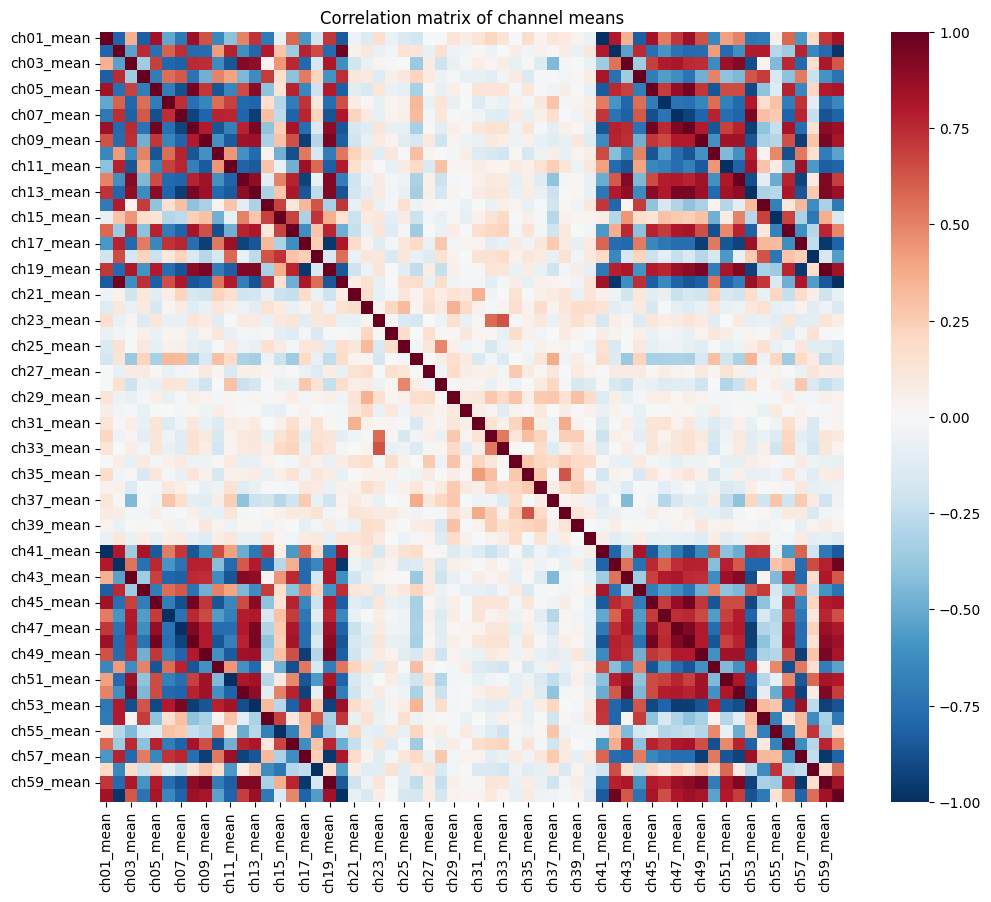

In [181]:
# ======================================
# 7. Correlation heatmap of channel means
# ======================================
import matplotlib.pyplot as plt
import seaborn as sns

# select only the mean features
mean_cols = [col for col in df_all.columns if col.endswith('_mean')]

# compute correlation matrix
corr_means = df_all[mean_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_means, center=0, cmap='RdBu_r')
plt.title('Correlation matrix of channel means')
plt.show()


# 2. Channel 01 Mean by Gesture Label
This boxplot compares the distribution of the mean amplitude on channel 01 for each gesture class (0= relax, 1=fist, 2=peace, 3=open). Although all three distributions overlap substantially, note that the “open” hand (label 3) tends to have slightly higher median mean-amplitude and a wider interquartile range, whereas the “peace” gesture (label 2) appears to sit lowest on average. Such subtle shifts may be exploitable by a classifier to distinguish gestures.


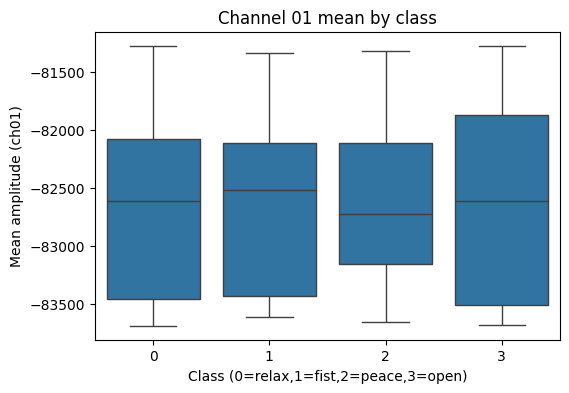

In [182]:

# ======================================
# 8. Boxplot of channel 01 mean by label
# ======================================
plt.figure(figsize=(6, 4))
sns.boxplot(x='label', y='ch01_mean', data=df_all)
plt.title('Channel 01 mean by class')
plt.xlabel('Class (0=relax,1=fist,2=peace,3=open)')
plt.ylabel('Mean amplitude (ch01)')
plt.show()



# 3. Pairwise Relationships for Channels 1–3 Means
The pairplot displays three channels’ mean amplitudes against each other and their univariate distributions, colored by gesture. The diagonal KDE plots show that the distributions of each channel mean are broadly similar across gestures, but there are slight visible shifts (e.g., channel 3 shows a bimodal tendency). The off-diagonal scatter plots hint at some weak linear structure—points cluster differently for each label—but also significant overlap, indicating these three features alone won’t perfectly separate all classes.

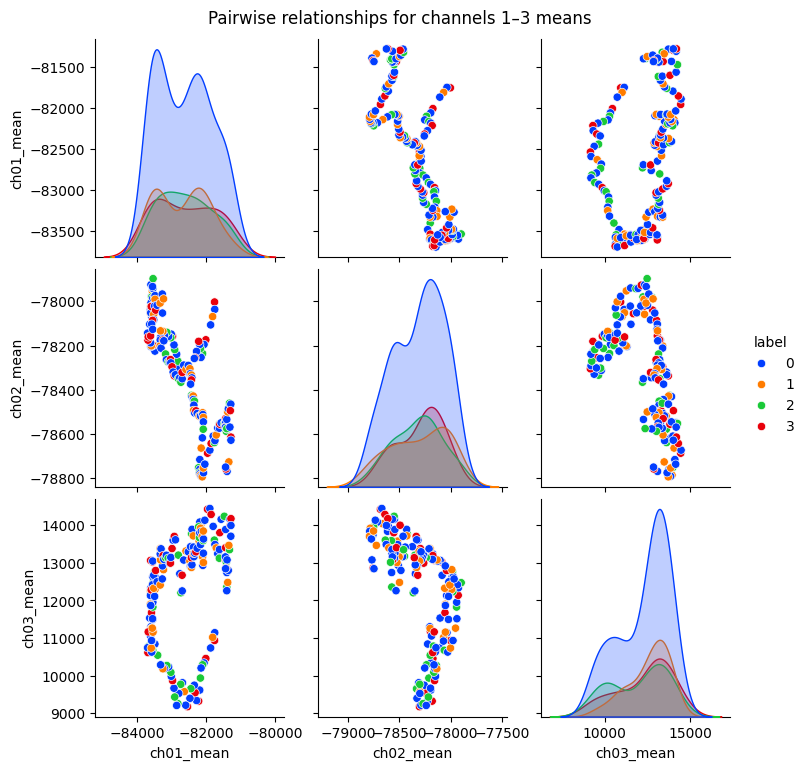

In [183]:
# ======================================
# 9. Pairplot for channels 1–3 means
# ======================================
sns.pairplot(df_all,
             vars=['ch01_mean','ch02_mean','ch03_mean'],
             hue='label',
             palette='bright')
plt.suptitle('Pairwise relationships for channels 1–3 means', y=1.02)
plt.show()


# 4. Violin Plots of Channel 01, 30, and 60 RMS by Gesture
The violin plots illustrate the full RMS-amplitude distributions of channels 01, 30, and 60 across the three gestures. Channel 01 (left) again shows a slight shift in center for gesture 3 (open), whereas channels 30 and 60 (middle and right) exhibit more subtle differences: channel 30’s RMS distribution for open hand extends to higher values, and channel 60 appears almost identical for all gestures. These plots confirm that RMS features vary by channel and gesture, but some channels carry more discriminative information than others.


<ipython-input-184-c3cfa9074d36>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


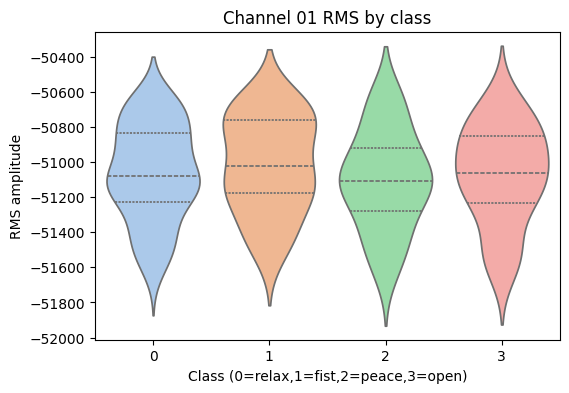

<ipython-input-184-c3cfa9074d36>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


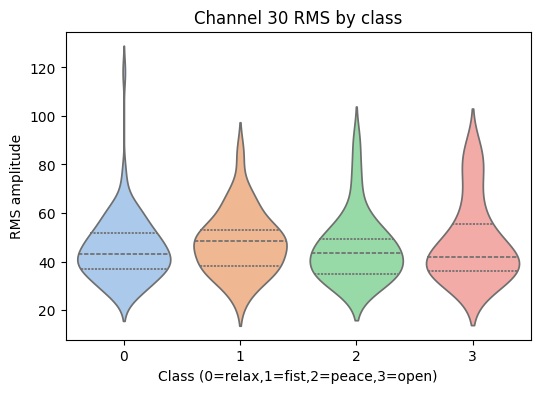

<ipython-input-184-c3cfa9074d36>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


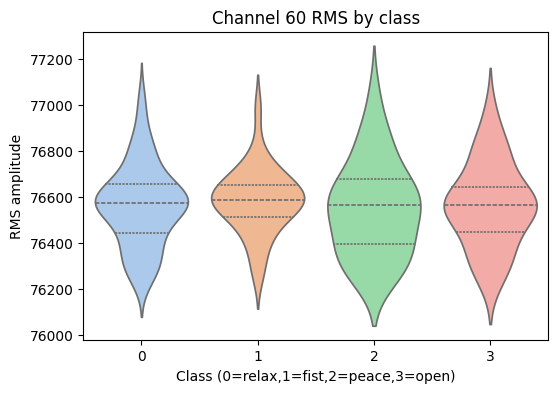

In [184]:
# ======================================
# 10. Violin plots for RMS of channels 1, 30, 60
# ======================================
for ch in [1, 30, 60]:
    plt.figure(figsize=(6,4))
    sns.violinplot(
        x='label',
        y=f'ch{ch:02d}_rms',
        data=df_all,
        inner='quartile',
        palette='pastel'
    )
    plt.title(f'Channel {ch:02d} RMS by class')
    plt.xlabel('Class (0=relax,1=fist,2=peace,3=open)')
    plt.ylabel('RMS amplitude')
    plt.show()

# 5. PCA (2 Components) of ECoG Features
In this scatter of the first two principal components (PC1 vs. PC2), each point represents one epoch’s 180-dimensional feature vector projected down to 2D. Although the three gesture classes (colors) are not perfectly separable, you can see two rough “arms” of points: one cluster on the right and one on the left, each containing mixed labels. This suggests that a linear subspace captures some variance related to gesture, but additional components or nonlinear modeling may be needed to fully discriminate.

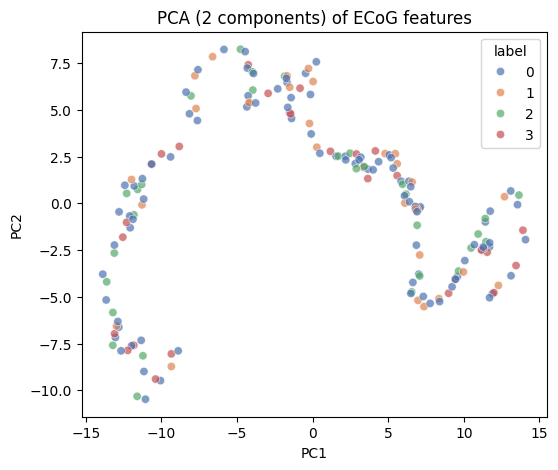

In [185]:
# 11. PCA (2 components) of all features
# ======================================
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Prepare data
X_all = df_all.drop(columns='label')
y_all = df_all['label']
X_scaled = StandardScaler().fit_transform(X_all)

# PCA
pca = PCA(n_components=2)
pcs = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(6,5))
sns.scatterplot(
    x=pcs[:,0], y=pcs[:,1],
    hue=y_all,
    palette='deep',
    alpha=0.7
)
plt.title('PCA (2 components) of ECoG features')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


# 6. Average Time Course of Channel 01 per Gesture
This line plot shows the mean time-series (over 2 s post-cue) for channel 01, averaged separately for each gesture. Gesture 1 (fist) begins at the lowest baseline and exhibits a small rising trend, whereas gestures 2 (peace) and 3 (open) start higher and remain relatively flat. These temporal differences—particularly the rising deflection around 0.2–0.5 s in the fist trials—could be leveraged by time-sensitive models (e.g., CNN, LSTM) to improve classification.

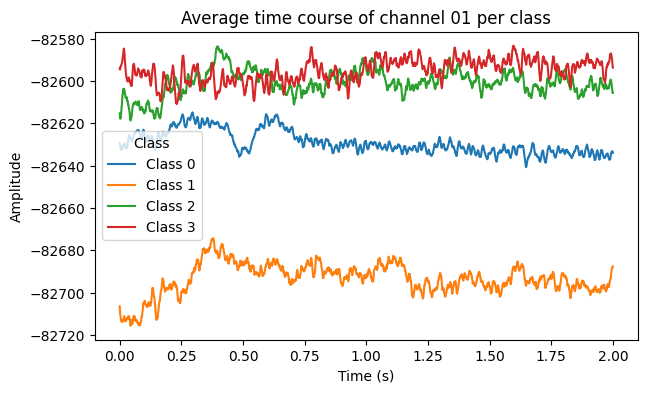

In [186]:
# ======================================
# 12. Average time course of channel 01 per class
# ======================================
times = epochs_all.times
data_all = epochs_all.get_data()  # shape (180, 60, samples)

plt.figure(figsize=(7,4))
for cls in sorted(df_all['label'].unique()):
    idx = np.where(df_all['label']==cls)[0]
    mean_ts = data_all[idx, 0, :].mean(axis=0)
    plt.plot(times, mean_ts, label=f'Class {cls}')
plt.legend(title='Class')
plt.title('Average time course of channel 01 per class')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

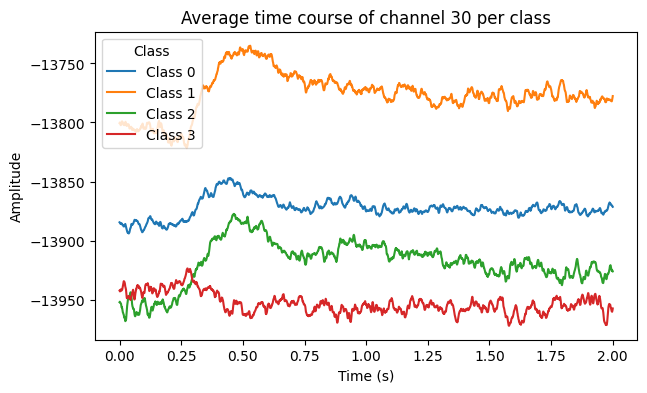

In [201]:
# ======================================
# 12. Average time course of channel 30 per class
# ======================================
times = epochs_all.times
data_all = epochs_all.get_data()  # shape (180, 60, samples)

plt.figure(figsize=(7,4))
for cls in sorted(df_all['label'].unique()):
    idx = np.where(df_all['label']==cls)[0]
    mean_ts = data_all[idx, 29, :].mean(axis=0)
    plt.plot(times, mean_ts, label=f'Class {cls}')
plt.legend(title='Class')
plt.title('Average time course of channel 30 per class')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

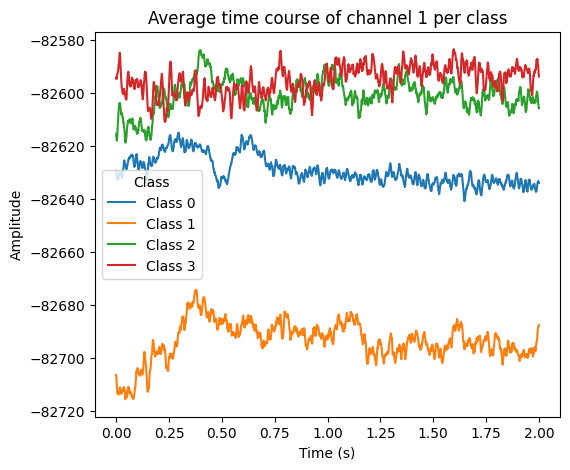

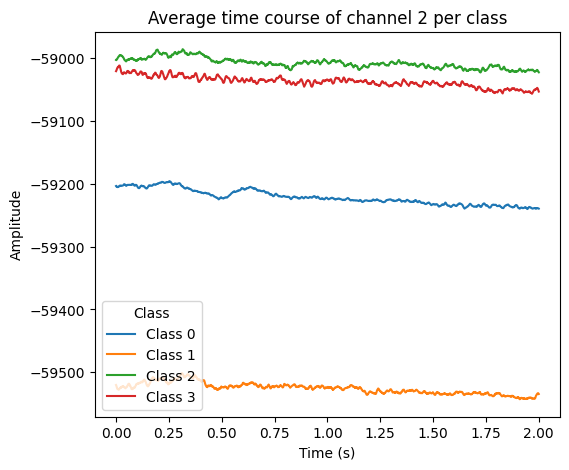

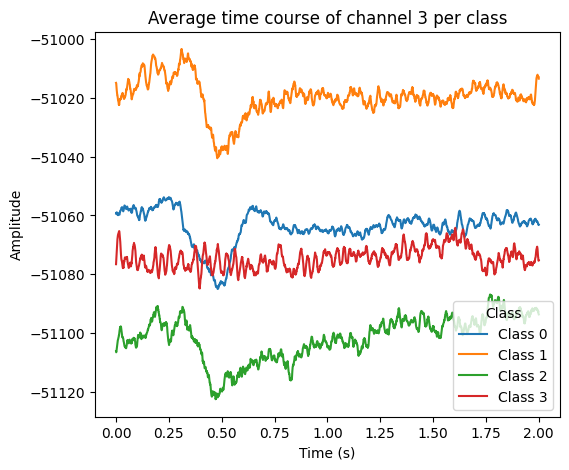

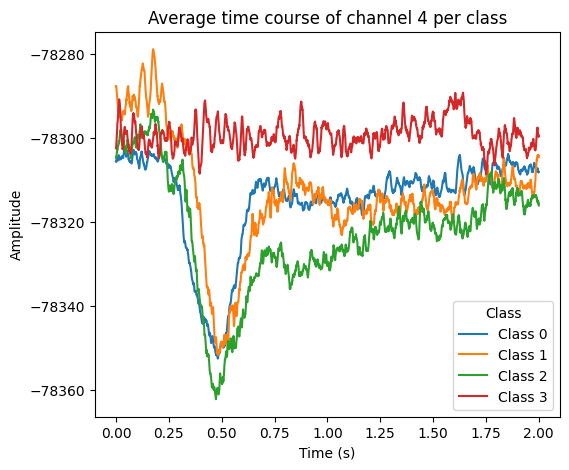

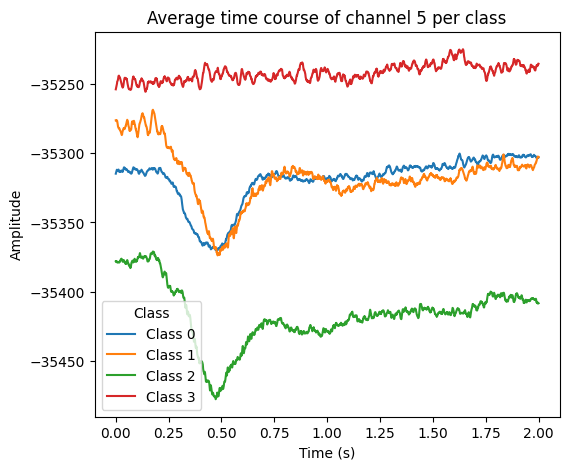

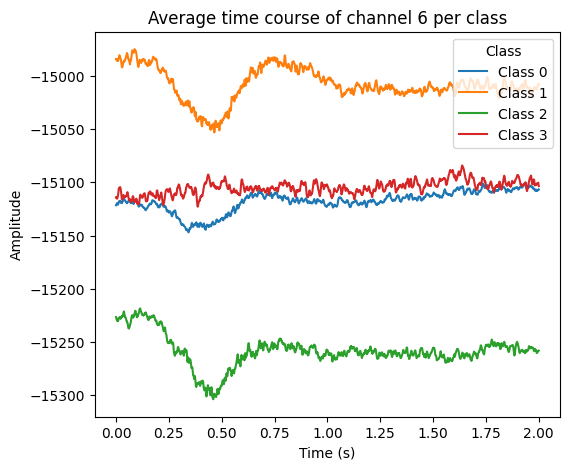

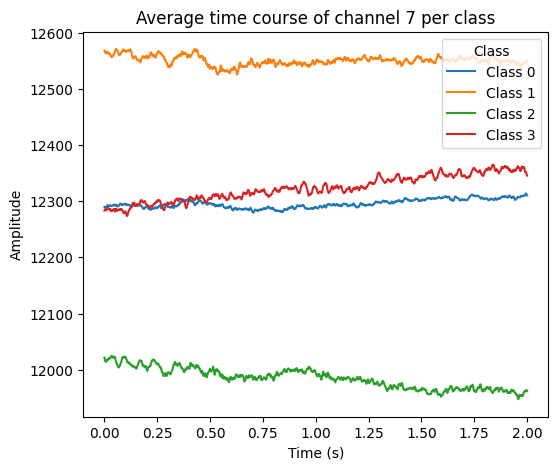

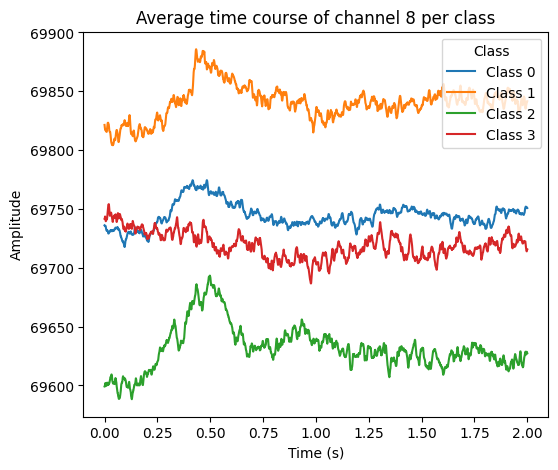

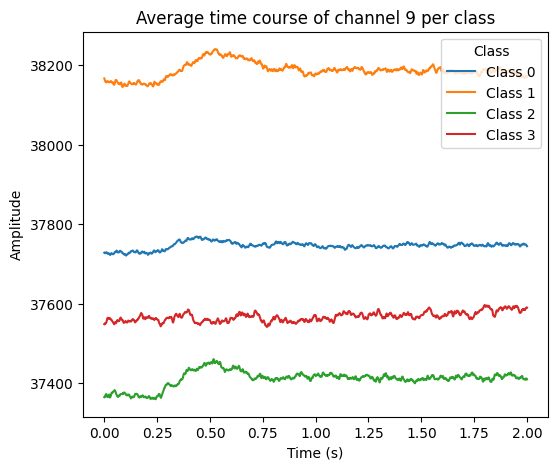

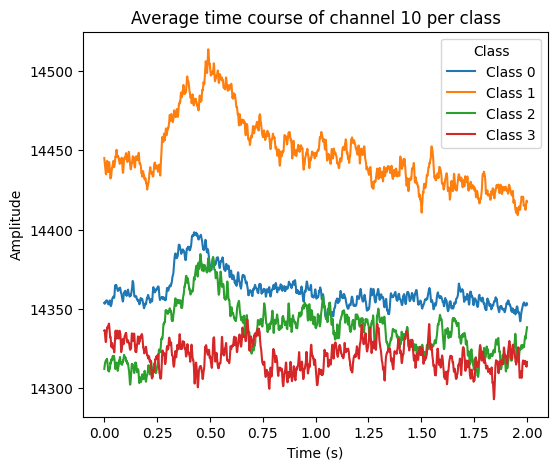

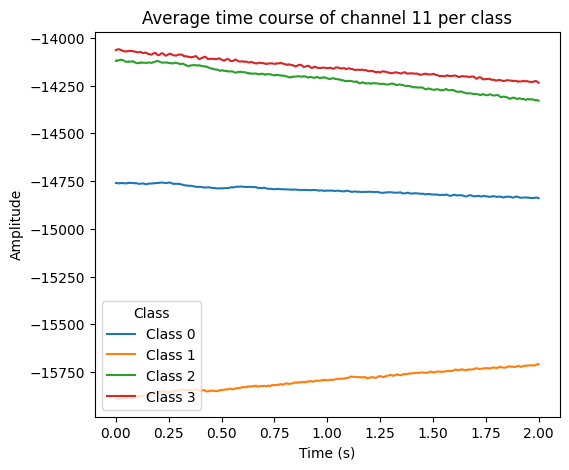

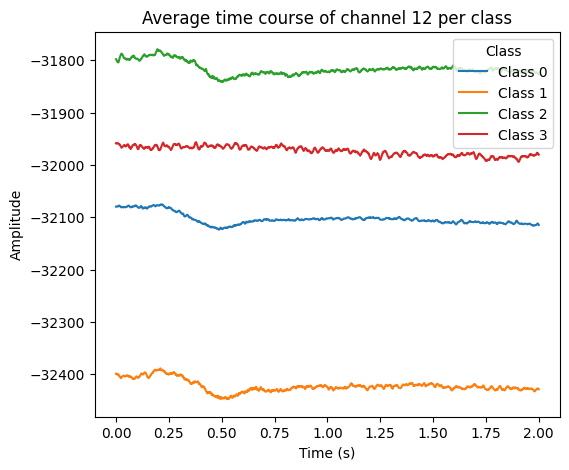

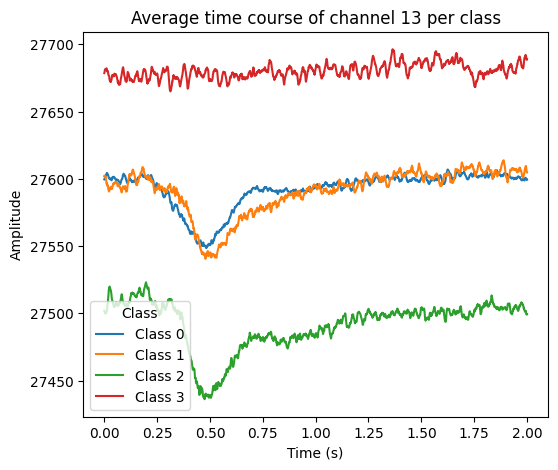

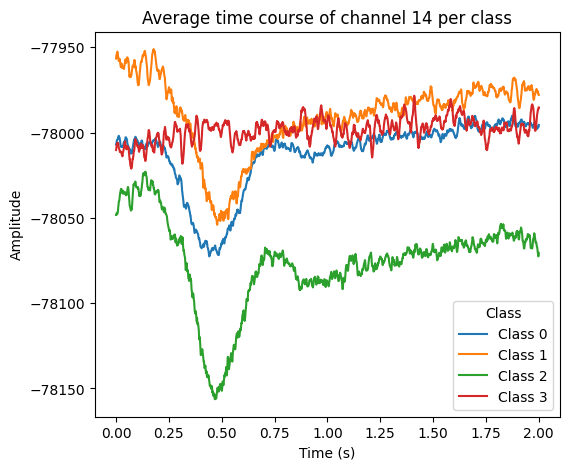

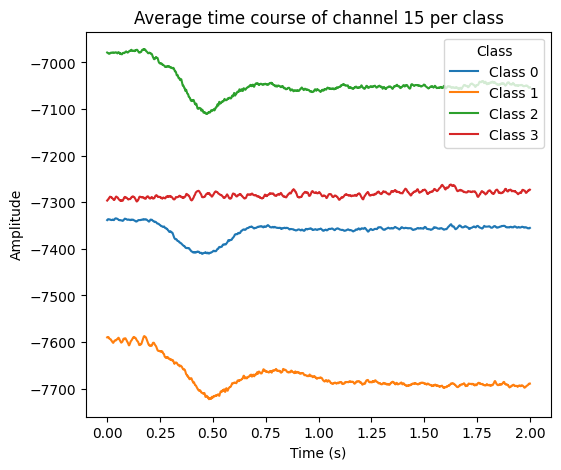

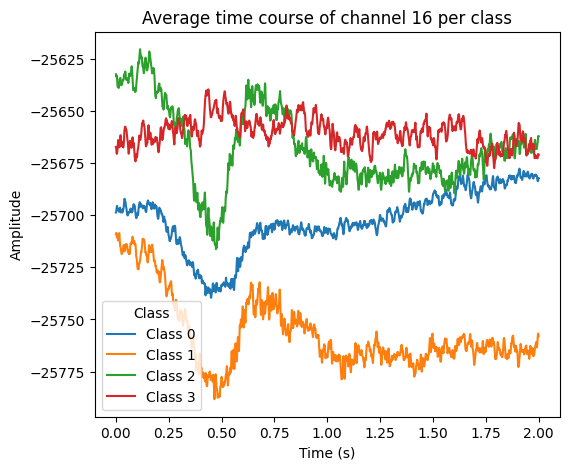

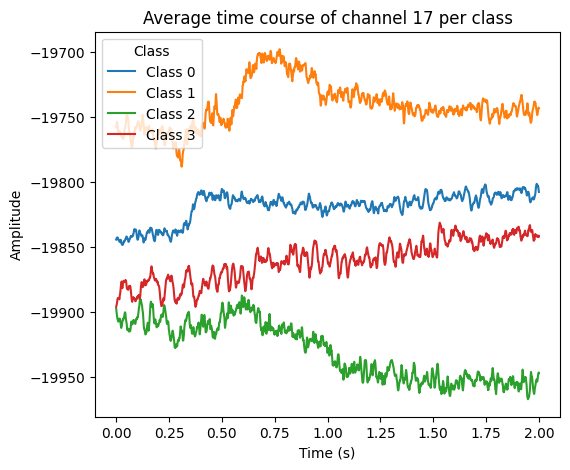

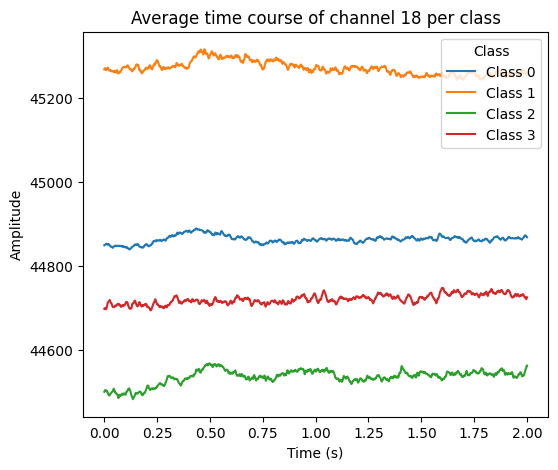

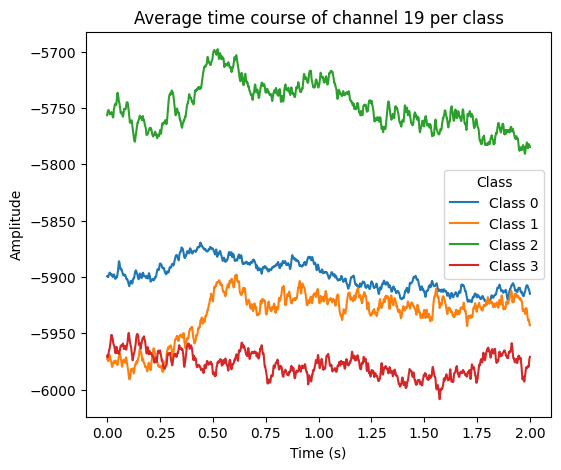

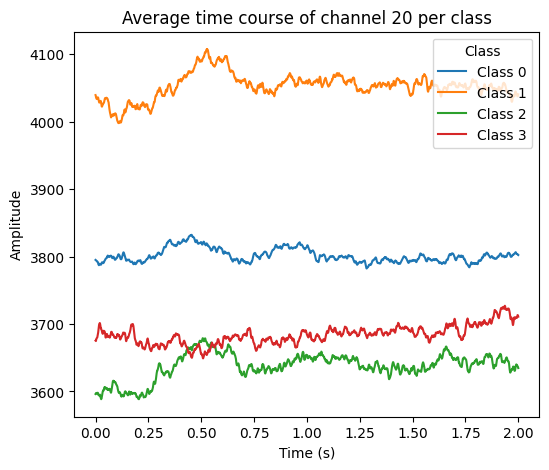

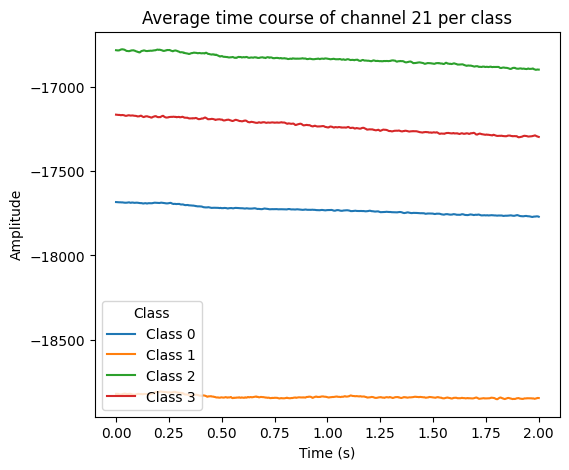

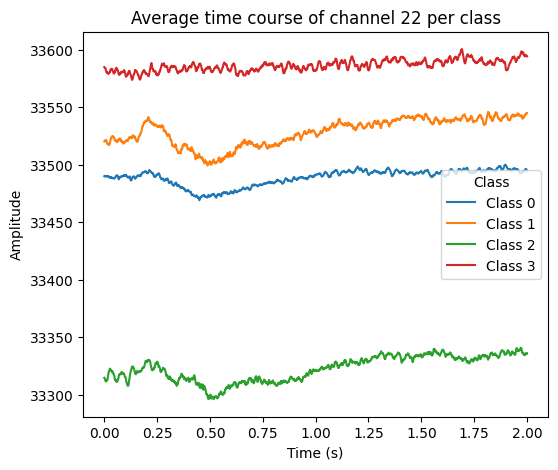

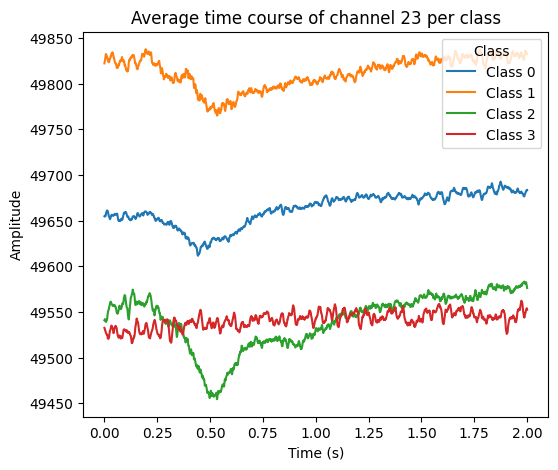

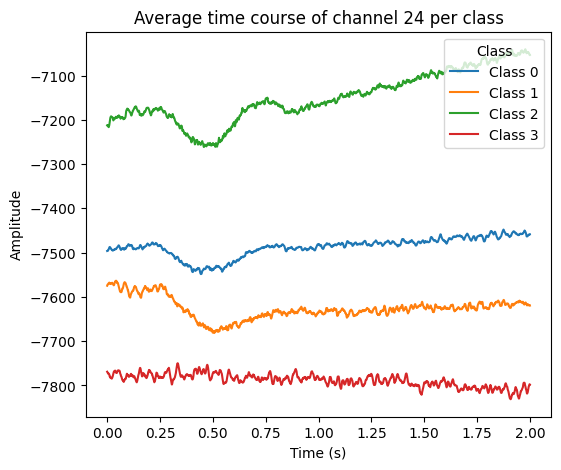

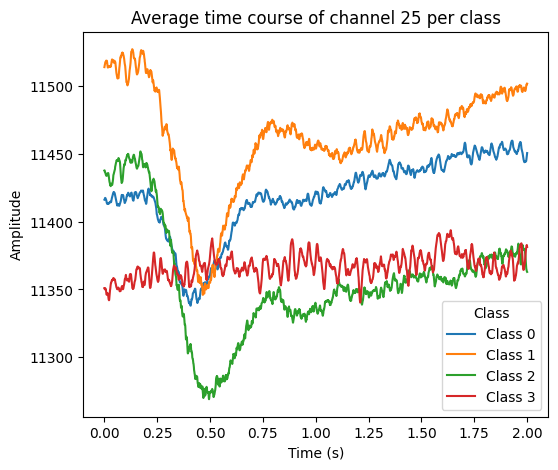

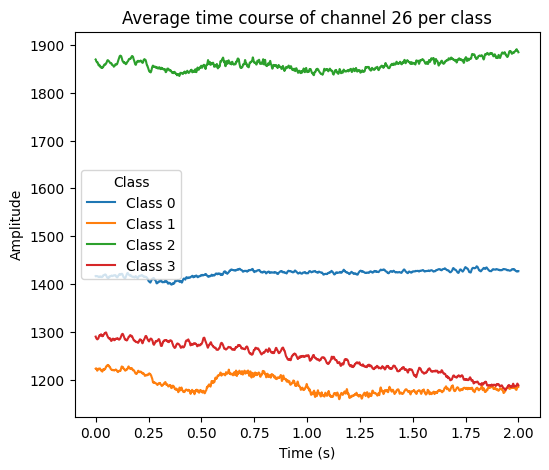

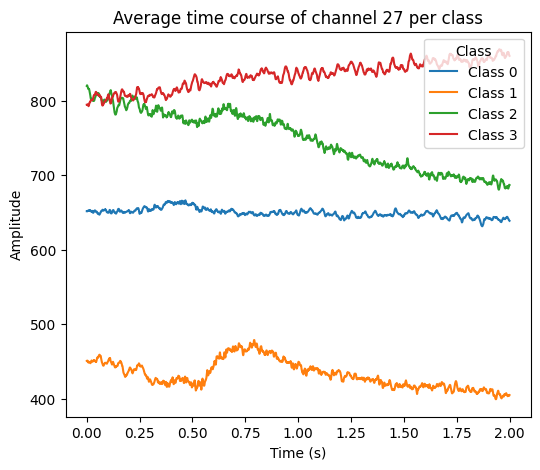

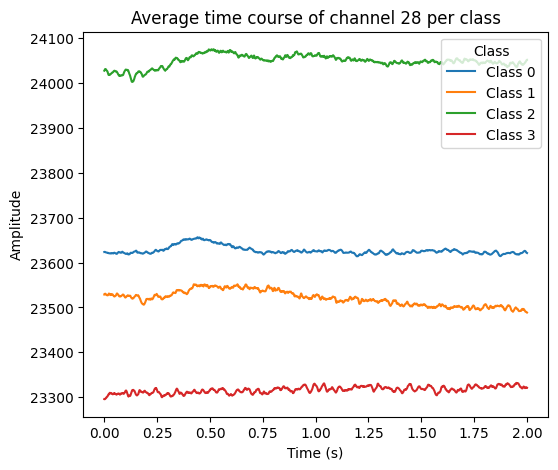

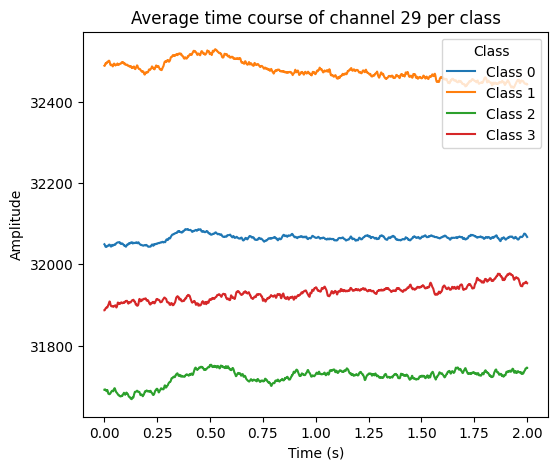

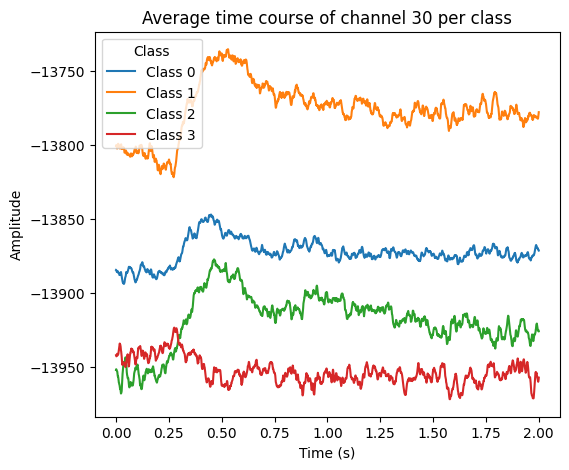

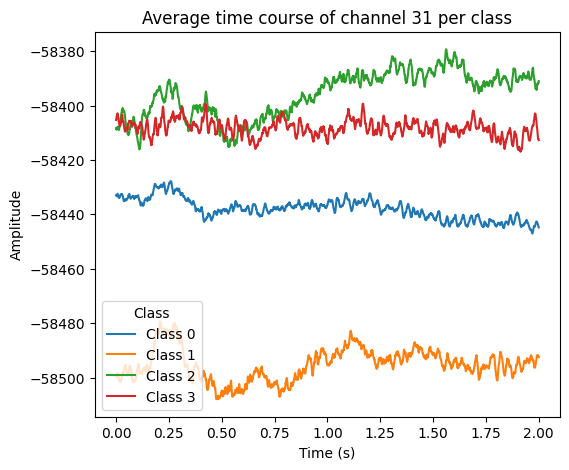

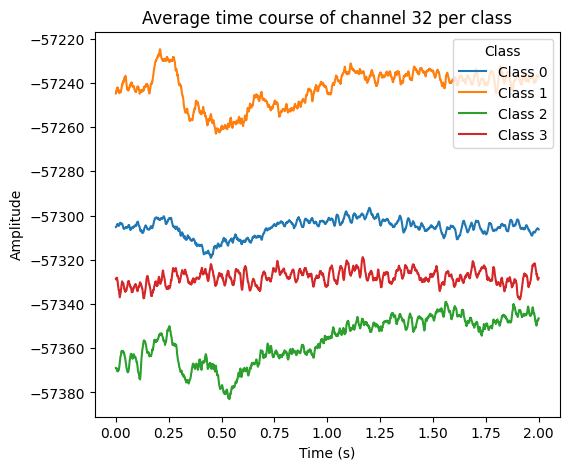

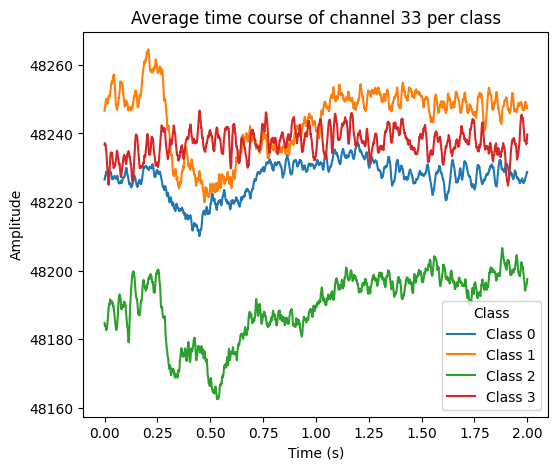

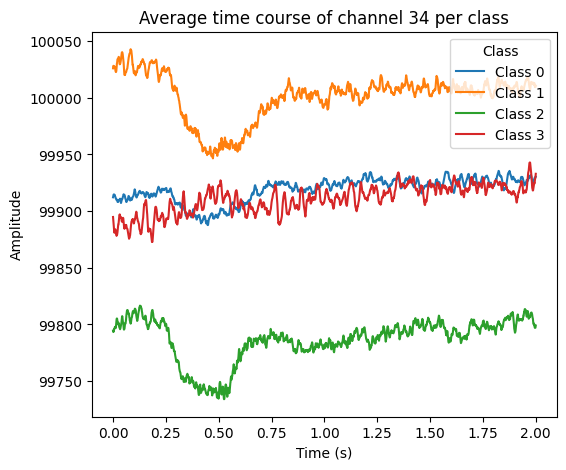

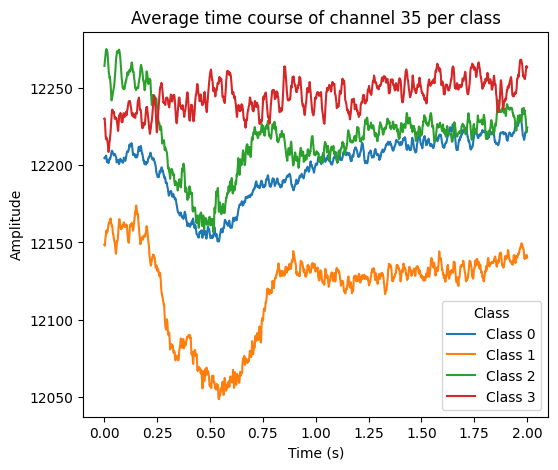

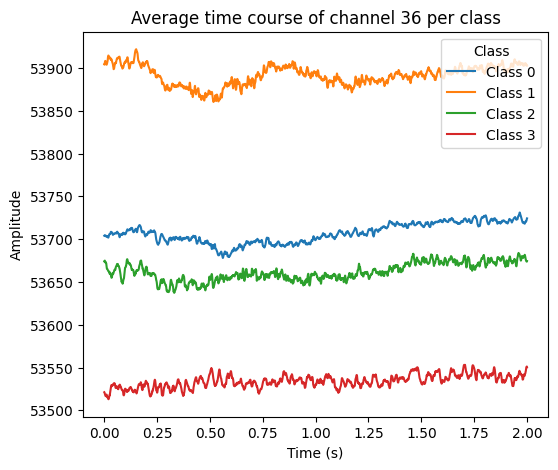

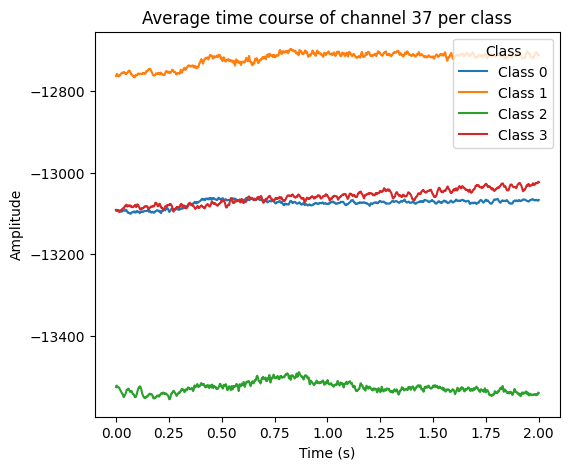

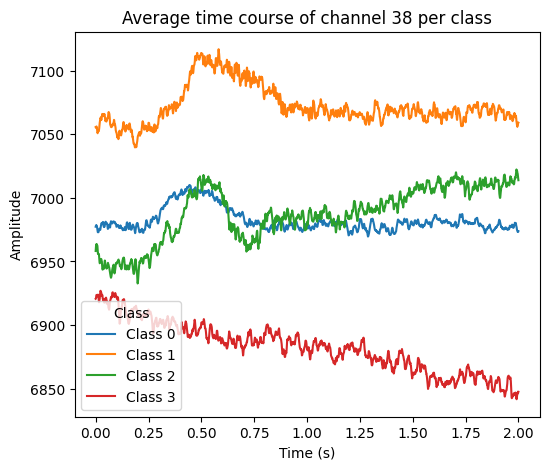

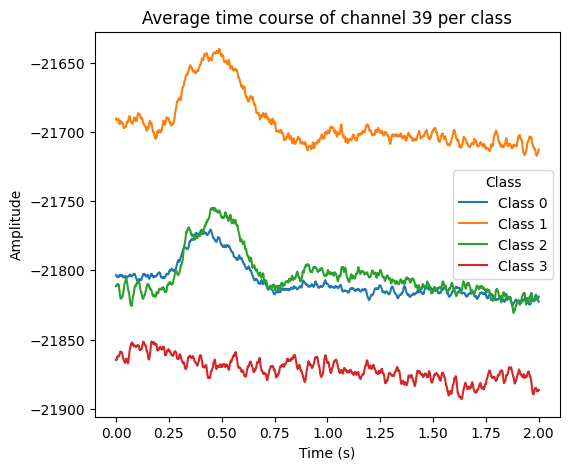

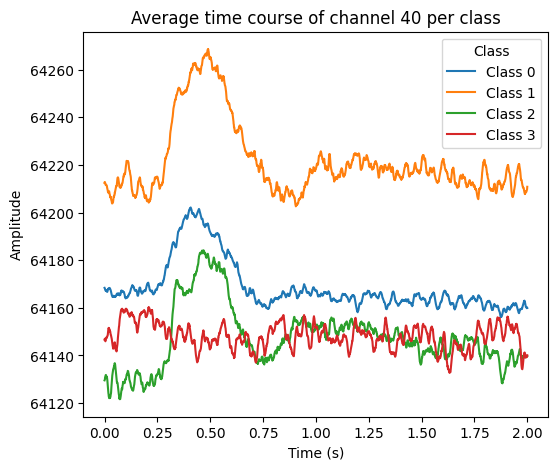

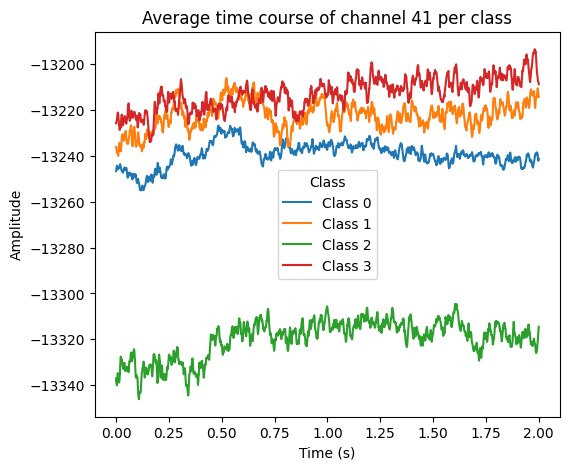

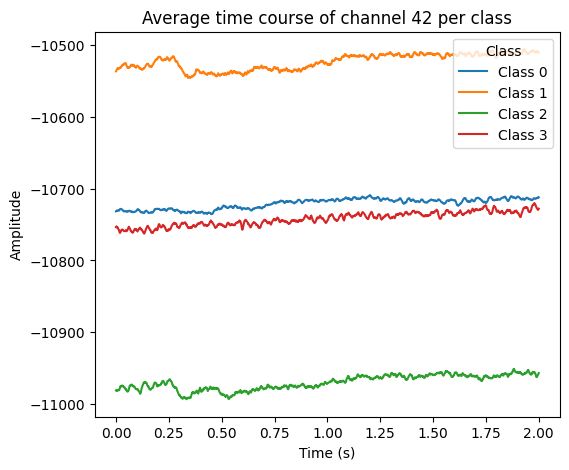

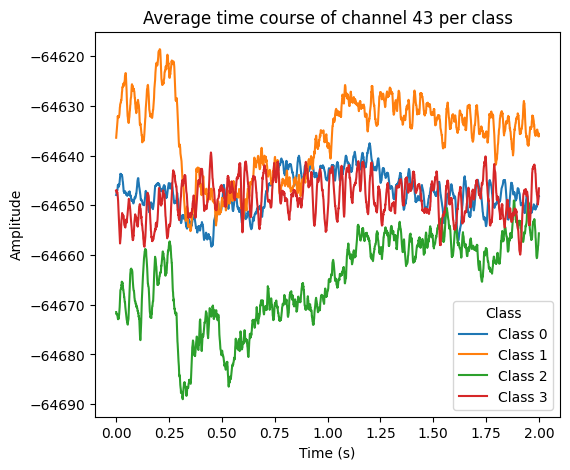

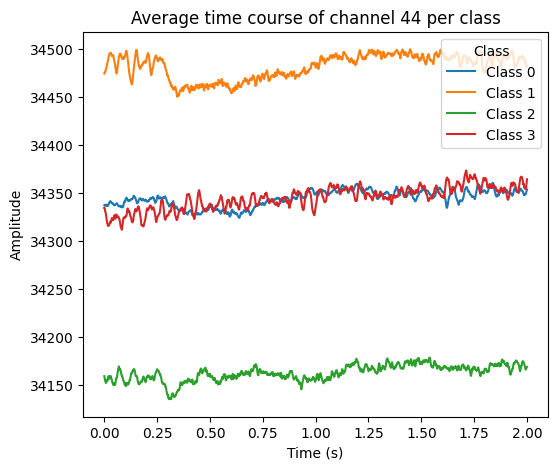

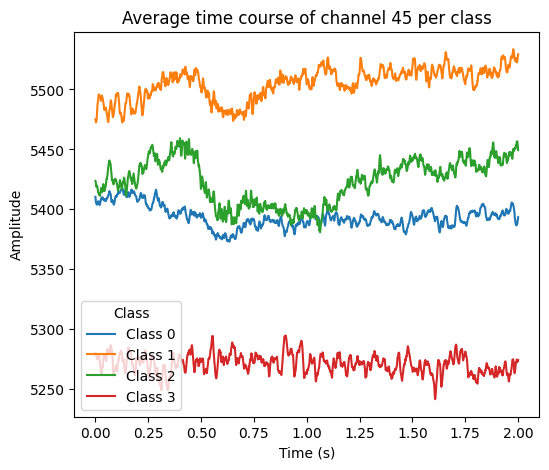

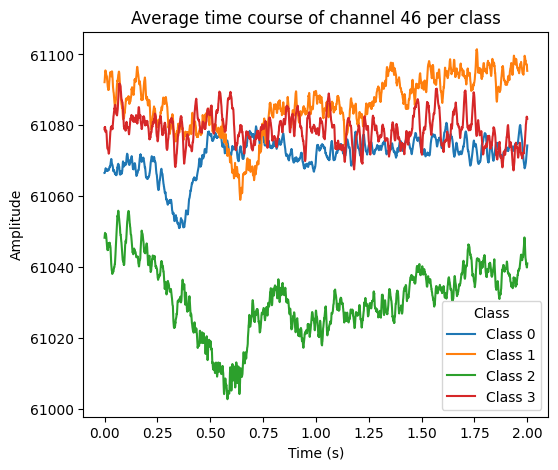

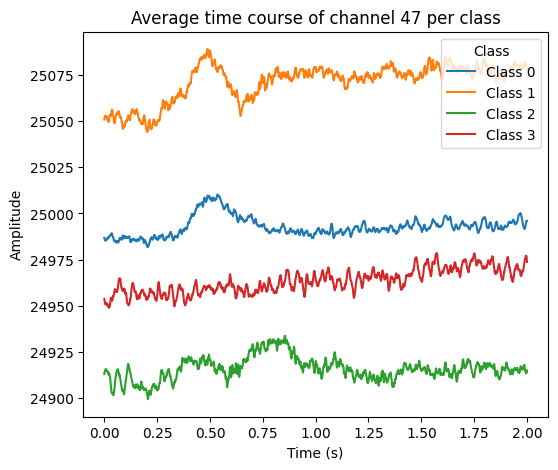

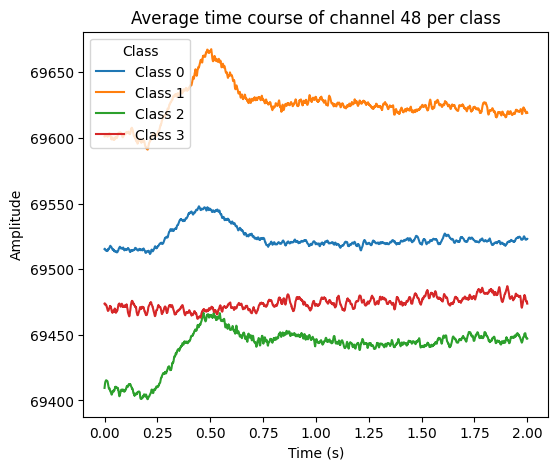

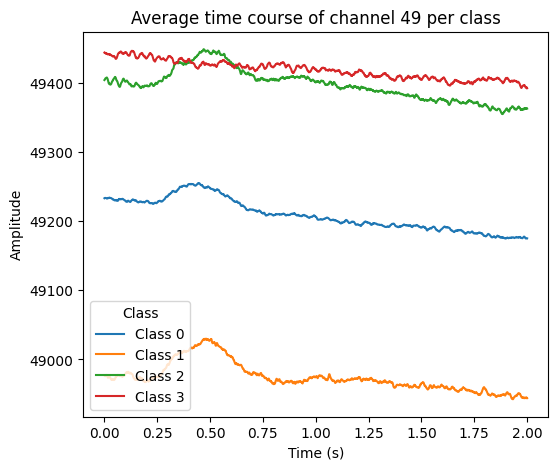

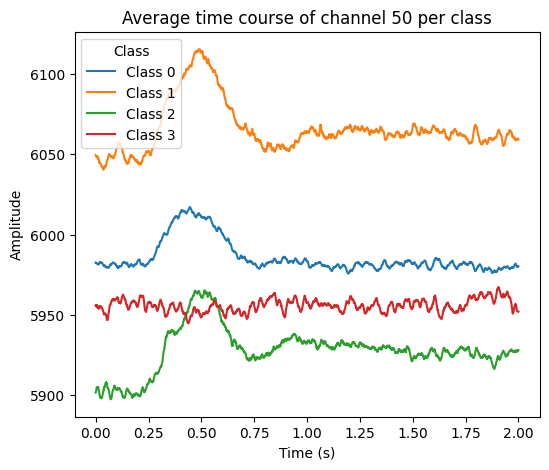

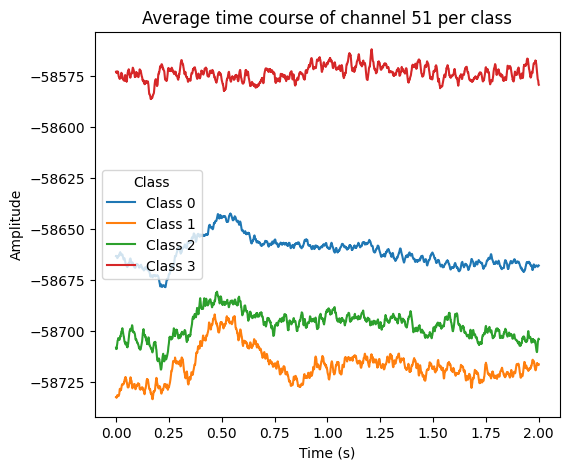

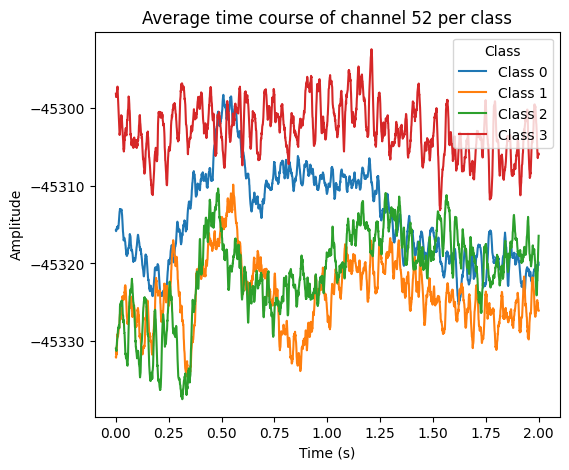

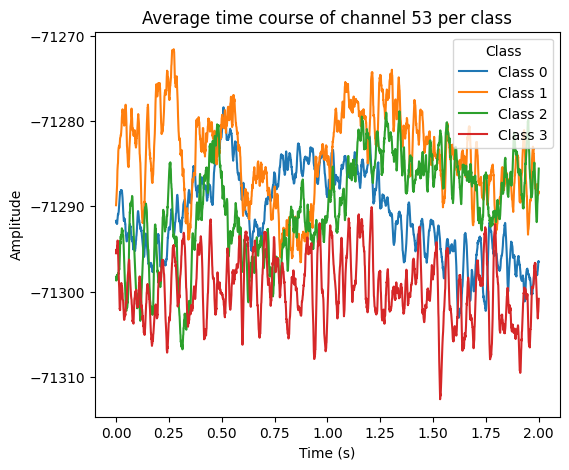

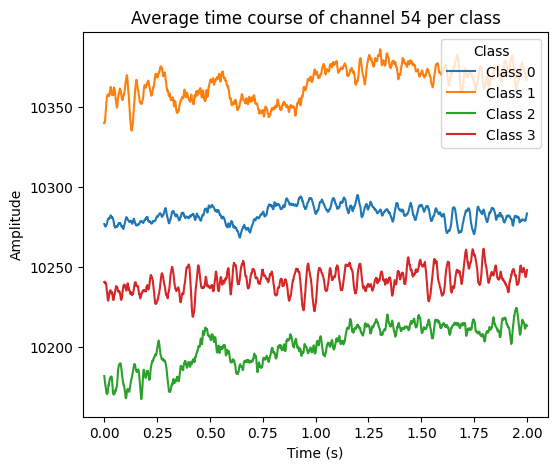

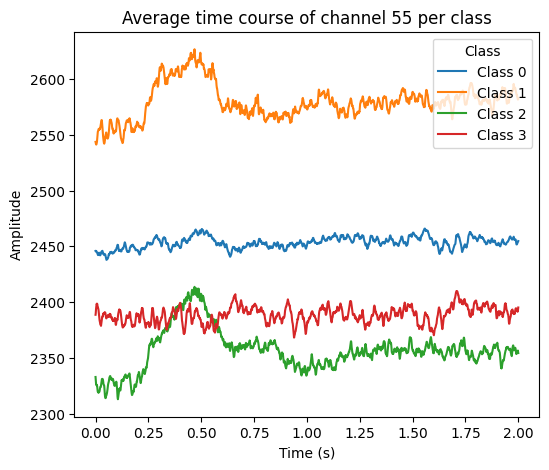

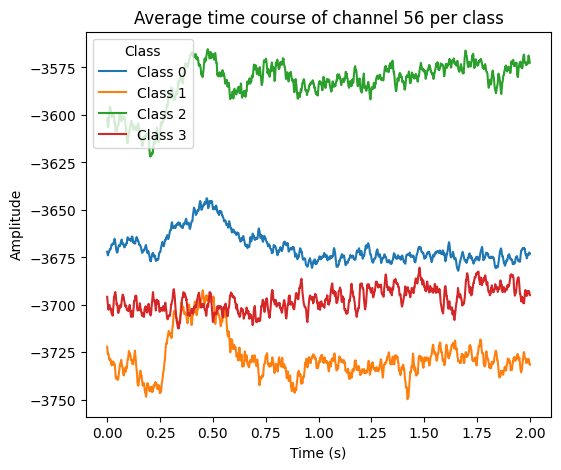

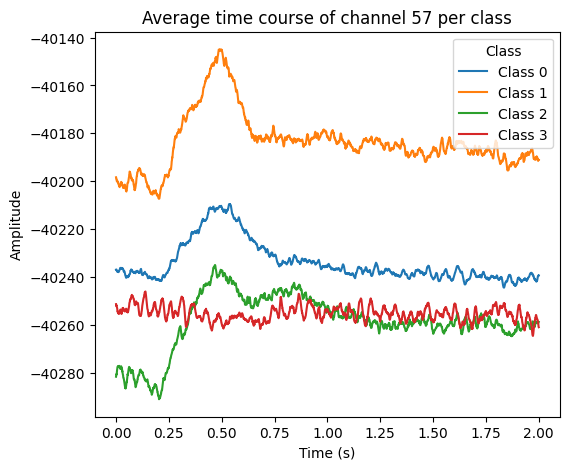

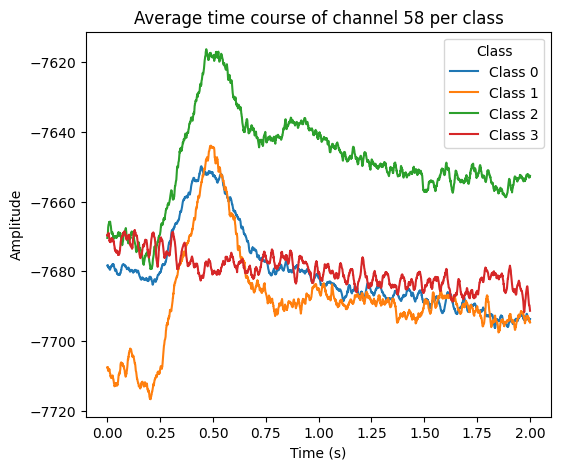

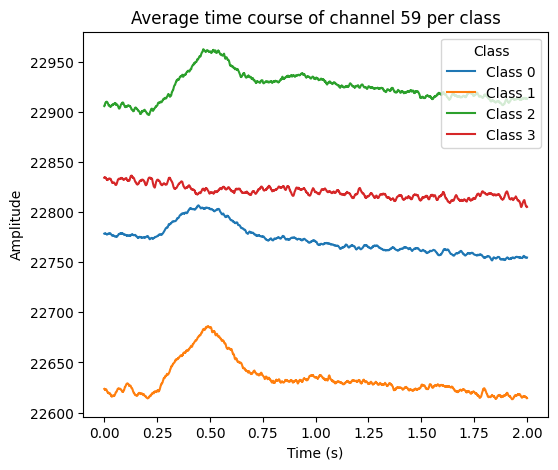

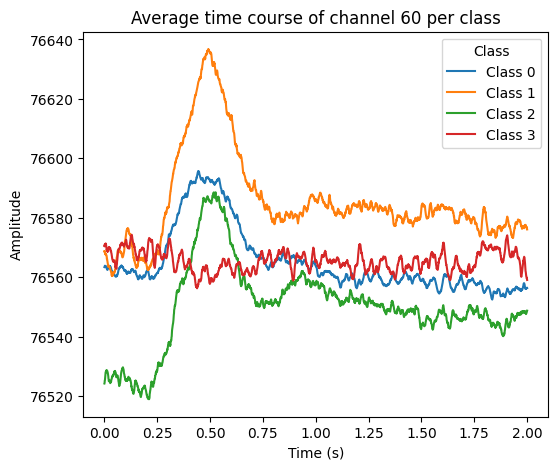

In [218]:
for i in range(0,60):
  plt.figure(figsize=(6,5))
  for cls in sorted(df_all['label'].unique()):
    idx = np.where(df_all['label']==cls)[0]
    mean_ts = data_all[idx, i, :].mean(axis=0)
    plt.plot(times, mean_ts, label=f'Class {cls}')
  plt.legend(title='Class')
  plt.title('Average time course of channel ' + str(i+1) + ' per class')
  plt.xlabel('Time (s)')
  plt.ylabel('Amplitude')
  plt.show()

# 7. Mean of First 20 Features per Gesture (Heatmap)
Here we plot the class-wise means of the first 20 features (i.e., the means, stds, and RMS for channels 1–7) for each gesture. Each row is a gesture (1–3) and each column a feature. Notice that for ch03_mean and ch07_std, gesture 3 (open) consistently shows higher values, while gesture 2 (peace) often has the lowest. This summary highlights which individual features differ most between classes and can guide feature selection or channel weighting in downstream models.

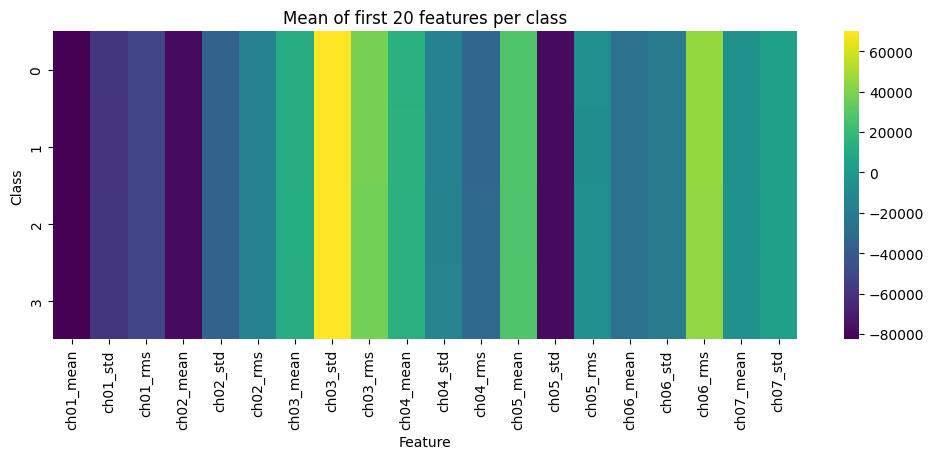

In [187]:
# ======================================
# 13. Heatmap of feature means for first 20 features per class
# ======================================
class_means = df_all.groupby('label').mean()

plt.figure(figsize=(12,4))
sns.heatmap(
    class_means.iloc[:, :20],
    cmap='viridis',
    annot=False
)
plt.title('Mean of first 20 features per class')
plt.xlabel('Feature')
plt.ylabel('Class')
plt.show()